In [6]:
#Importing Libraries
%pylab inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Load the data into a pandas dataframe
df = pd.read_csv(r"C:\Users\hp\Downloads\uber-raw-data-sep14\uber-raw-data-sep14.csv")

In [8]:
df.head()

,Date/Time,Lat,Lon,Base
0,09-01-2014 00:01,40.2201,-74.0021,B02512
1,09-01-2014 00:01,40.7500,-74.0027,B02512
2,09-01-2014 00:03,40.7559,-73.9864,B02512
3,09-01-2014 00:06,40.7450,-73.9889,B02512
4,09-01-2014 00:11,40.8145,-73.9444,B02512


In [9]:
#Converting Date/Time column of strings into timestamps
df['Date/Time'] = df['Date/Time'].map(pd.to_datetime)

In [10]:
df.sample(8)

,Date/Time,Lat,Lon,Base
768864,2014-09-18 10:47:00,40.6667,-73.9426,B02682
295539,2014-09-03 06:31:00,40.7364,-73.9794,B02617
482882,2014-09-16 22:51:00,40.7502,-73.9843,B02617
483483,2014-09-17 03:39:00,40.6936,-73.9889,B02617
660553,2014-09-02 18:28:00,40.7785,-73.9836,B02682
907637,2014-09-13 13:38:00,40.7467,-73.9764,B02764
844735,2014-09-30 07:42:00,40.7211,-73.9873,B02682
70040,2014-09-05 18:50:00,40.7556,-73.9718,B02598


In [11]:
#type of date time column has changed
print(type(df['Date/Time']))

<class 'pandas.core.series.Series'>


In [12]:
#Diffrentiating diffrent attributes of time stamp for analysis
def Date_of_month(dt):
    return dt.day

df['Date_of_Month'] = df['Date/Time'].map(Date_of_month)

def weekday(dt):
    return dt.weekday()

df['weekday'] = df['Date/Time'].map(weekday)

def hour(dt):
    return dt.hour

df['hour'] = df['Date/Time'].map(hour)

df.sample(10)

,Date/Time,Lat,Lon,Base,Date_of_Month,weekday,hour
448321,2014-09-13 23:28:00,40.7498,-73.9856,B02617,13,5,23
457336,2014-09-14 19:16:00,40.7082,-74.0166,B02617,14,6,19
1000685,2014-09-27 13:15:00,40.7452,-73.9939,B02764,27,5,13
291337,2014-09-02 18:33:00,40.7590,-73.9816,B02617,2,1,18
688969,2014-09-06 16:35:00,40.7298,-73.9914,B02682,6,5,16
538129,2014-09-20 23:17:00,40.7116,-73.9594,B02617,20,5,23
720167,2014-09-11 08:43:00,40.7409,-73.9975,B02682,11,3,8
828175,2014-09-27 12:10:00,40.7657,-73.9654,B02682,27,5,12
994354,2014-09-26 18:53:00,40.7259,-73.9056,B02764,26,4,18
383004,2014-09-09 13:17:00,40.7875,-73.9545,B02617,9,1,13


''

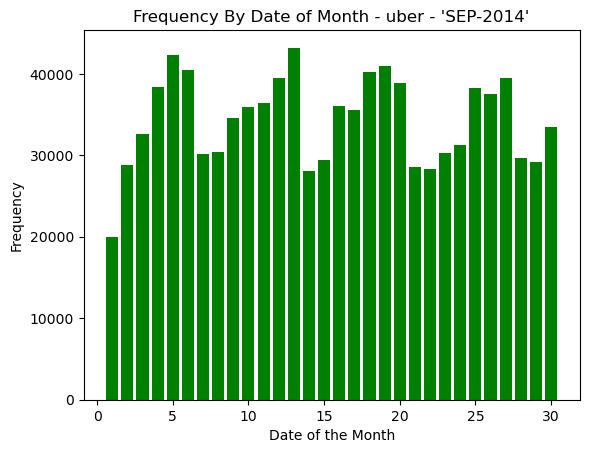

In [13]:
#Analysing the frequency distribution among dates
hist(df.Date_of_Month, bins=30, rwidth=.8, range=(0.5, 30.5),color='green')
xlabel('Date of the Month')
ylabel('Frequency')
title("Frequency By Date of Month - uber - 'SEP-2014'")
;

In [14]:
#Printing Each frequency of data by dates
def row_count(rows):
    return len(rows)

date_freq = df.groupby('Date_of_Month').apply(row_count)
date_freq

Date_of_Month
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

''

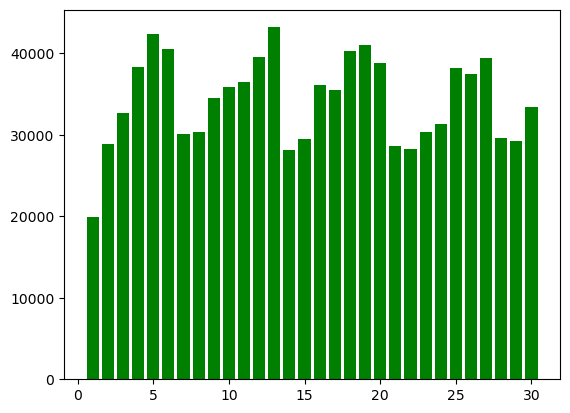

In [15]:
#we can also view the frequency distribution using bar graph
bar(range(1, 31),date_freq,color='green')
;

In [16]:
sorted_data_freq=date_freq.sort_values()
sorted_data_freq

Date_of_Month
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

''

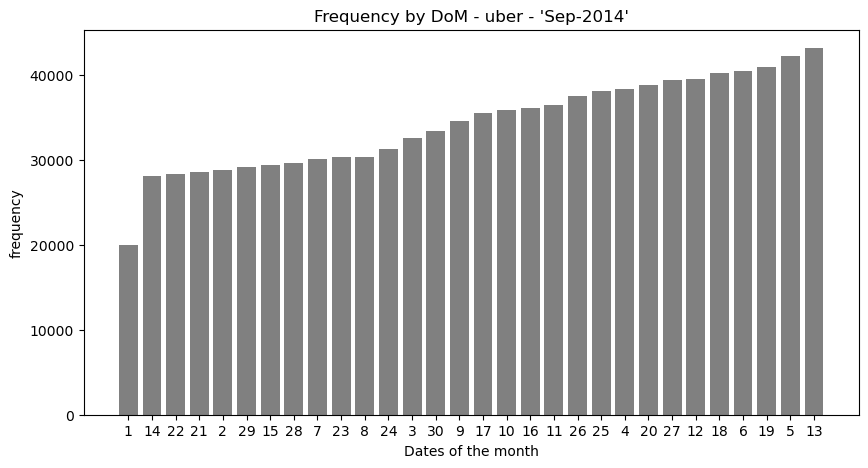

In [17]:
#final analysis of dates in sorted order
figure(figsize=(10, 5))
bar(range(1, 31),sorted_data_freq,color='grey')
xticks(range(1,31), sorted_data_freq.index)
xlabel('Dates of the month')
ylabel('frequency')
title("Frequency by DoM - uber - 'Sep-2014'")
;

''

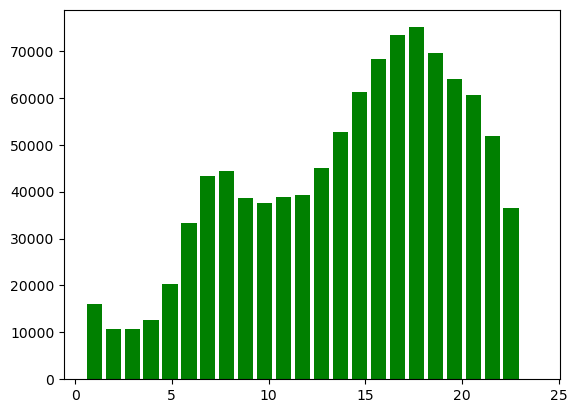

In [18]:
#Analysis By Hour
hist(df.hour, bins=24, range=(.5, 24),rwidth=.8,color='green')
;

In [19]:
def hour_count(rows):
    return len(rows)

hour_freq = df.groupby('hour').apply(hour_count)
hour_freq

hour
0     24133
1     16107
2     10702
3     10789
4     12675
5     20262
6     33307
7     43314
8     44477
9     38542
10    37634
11    38821
12    39193
13    45042
14    52643
15    61219
16    68224
17    73373
18    75040
19    69660
20    63988
21    60606
22    51817
23    36568
dtype: int64

In [20]:
sorted_hour_freq=hour_freq.sort_values()
sorted_hour_freq

hour
2     10702
3     10789
4     12675
1     16107
5     20262
0     24133
6     33307
23    36568
10    37634
9     38542
11    38821
12    39193
7     43314
8     44477
13    45042
22    51817
14    52643
21    60606
15    61219
20    63988
16    68224
19    69660
17    73373
18    75040
dtype: int64

''

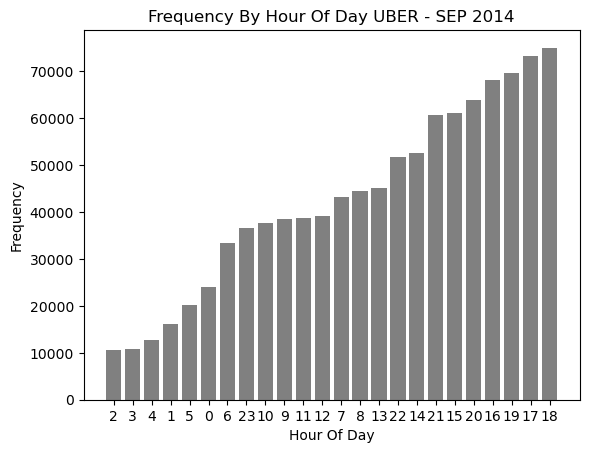

In [21]:
bar(range(1,25),sorted_hour_freq,color='grey')
xticks(range(1,25), sorted_hour_freq.index)
xlabel('Hour Of Day')
ylabel('Frequency')
title('Frequency By Hour Of Day UBER - SEP 2014')
;

''

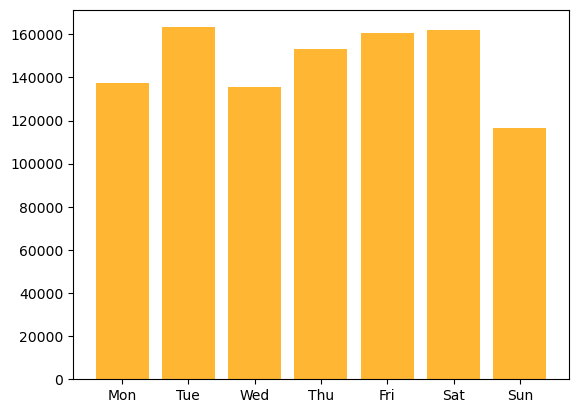

In [22]:
#Analysis By Weekday
hist(df.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='orange', alpha=.8)
xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;

In [23]:
#Cross analysis of Hour and weekday
cross = df.groupby('weekday hour'.split()).apply(row_count).unstack()

<AxesSubplot:xlabel='hour', ylabel='weekday'>

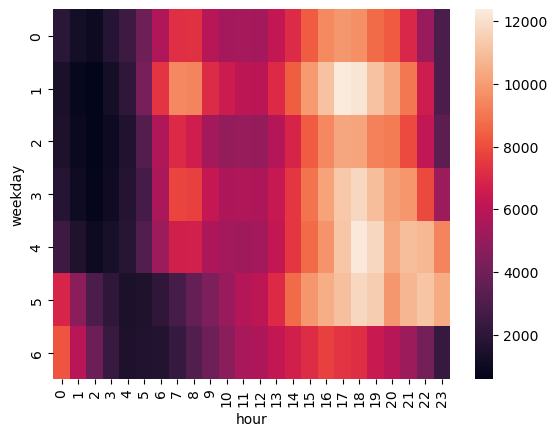

In [24]:
sns.heatmap(cross)

''

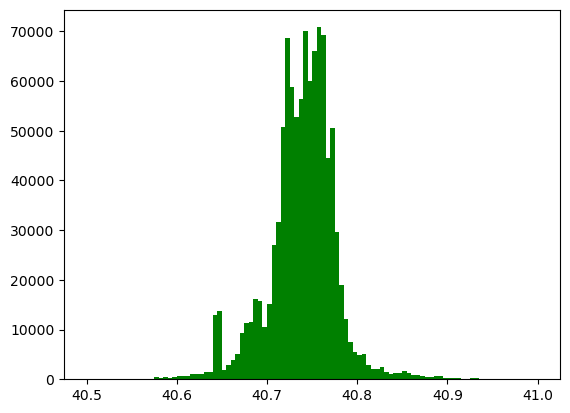

In [25]:
# Analysis by lat and lon
hist(df['Lat'], bins=100, range = (40.5, 41),color='green')
;

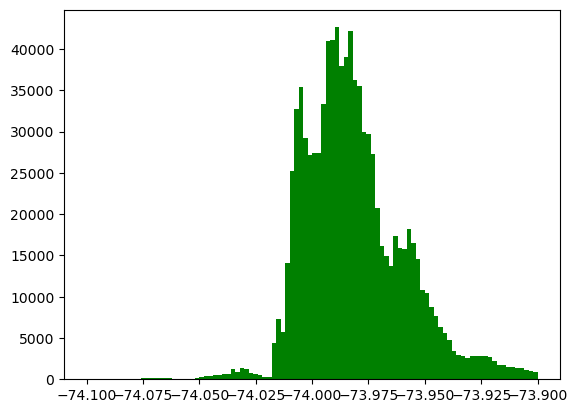

In [26]:
hist(df['Lon'], bins=100, range = (-74.1, -73.9),color='green');

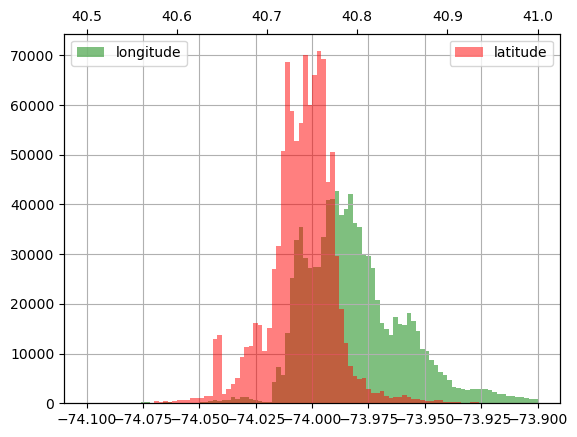

In [27]:
#cross analysis by lat and lon
hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
grid()
legend(loc='upper left')
twiny()
hist(df['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
legend(loc='best')

(40.7, 41.0)

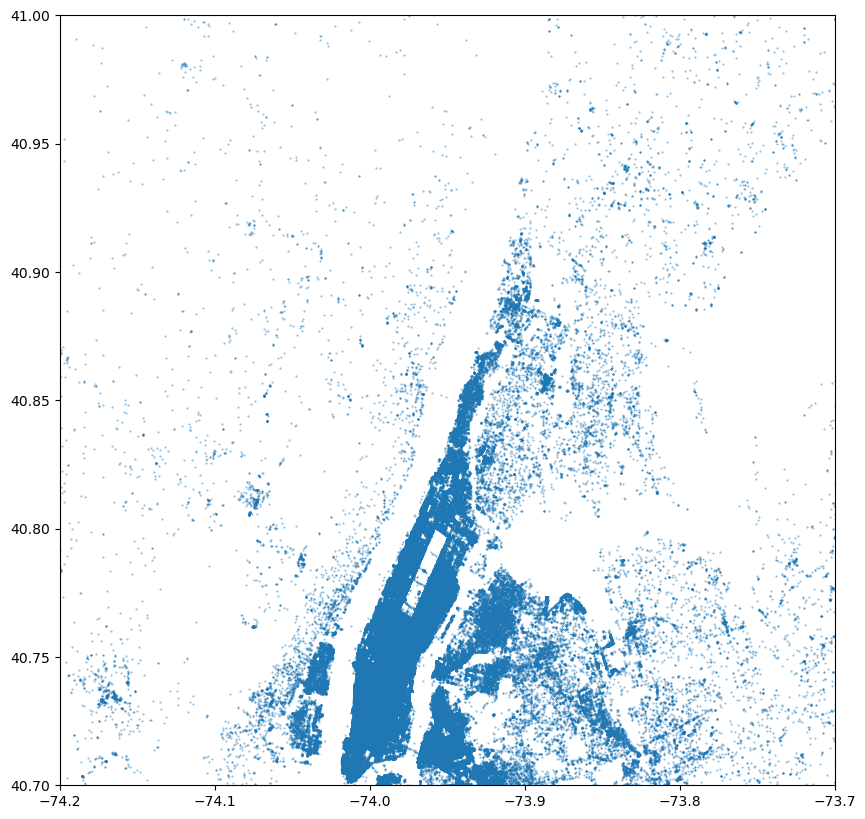

In [28]:
figure(figsize=(10, 10))
plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
xlim(-74.2, -73.7)
ylim(40.7, 41)